In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
words =  open('names.txt','r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
N = torch.zeros((27,27),dtype = torch.int32)
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [4]:
#build dataset
block_size = 3
X, Y = [], []
for word in words:
    # print(word)
    context = [0] * block_size
    for ch in word + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context),'--->',itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [5]:
X.shape


torch.Size([228146, 3])

In [6]:
#lookup table | embbeding
C = torch.randn((27, 10))

In [7]:
W1 = torch.randn((3 * C.shape[1], 200)) # can use fan_in /kaiming_normalize /0 mean unit standard gaussin 
b1 = torch.randn(200)

In [8]:
W2 = torch.randn((200, 27))
b2 = torch.randn(27)

In [9]:
param = [C, W1, b1, W2, b2]

In [10]:
epoch = 100000
lre = torch.linspace(-3,0,epoch)
lrs = 10**lre

In [15]:
for p in param:
        p.requires_grad = True
lossi, stepi = [], []  
for i in range(epoch):
    #minibatch
    ix = torch.randint(0, X.shape[0], (128,))
    #forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(emb.shape[0], W1.shape[0]) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    #backward
    for p in param:
        p.grad = None
    loss.backward()
    #updata
    lr = 0.01
    for p in param:
        p.data += -lr * p.grad
    # lri.append(lre[i])
    lossi.append(loss.log10().item())
    stepi.append(i)
    
loss = F.cross_entropy(logits, Y[ix])
loss.item()

2.1529126167297363

In [16]:
emb = C[X]
h = torch.tanh(emb.view(emb.shape[0], W1.shape[0]) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss.item()


2.1211042404174805

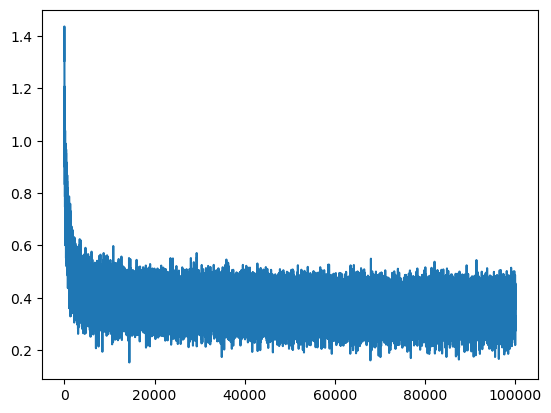

In [13]:
plt.plot(stepi,lossi)

In [17]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size # 初始化背景为 '...'
    
    while True:
        # --- 前向传播过程 ---
        # 1. 将当前的 context 转化为 Embedding
        emb = C[torch.tensor([context])] # 形状变为 (1, block_size, embedding_dim)
        
        # 2. 拉平并经过隐藏层 (注意要和训练时的 view 逻辑一致)
        # 这里的 6 是因为 block_size(3) * embedding_dim(2) = 6
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        
        # 3. 输出层得到 logits
        logits = h @ W2 + b2
        
        # 4. Softmax 得到概率分布
        probs = F.softmax(logits, dim=1)
        
        # --- 采样过程 ---
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        
        # --- 更新 context 滑动窗口 ---
        context = context[1:] + [ix]
        
        if ix == 0: # 抽到 '.' 则停止
            break
        out.append(itos[ix])
        
    print(''.join(out))

carmah
amille
khi
mili
taty
skaan
kena
hub
famerric
kaqui
ner
kia
chaiim
kaleigh
ham
join
quinthorocken
jadis
wazelo
dearyni
